In [92]:
import json
import torch.nn as nn
import torch
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib 
import os
from OS_CFAR_2D import DetectPeaksOSCFAR_2D
from scipy.special import softmax
from post_process_numpy_neu import peaks_detect,association,create_default,distribute,analyse

In [19]:
device='cpu'
def_map = torch.rand((16,3,256,256))
mask, peak_cls = create_default(def_map.shape,(3,5))
mask = mask.to(device=device)
peak_cls = peak_cls.to(device=device)

In [183]:
destination = r'G:\EFS-GX6\4130_Arbeitsgruppen\4137_KHO_Performance\Studentische_Themen\RaviKothari\thesis\images\exmp'

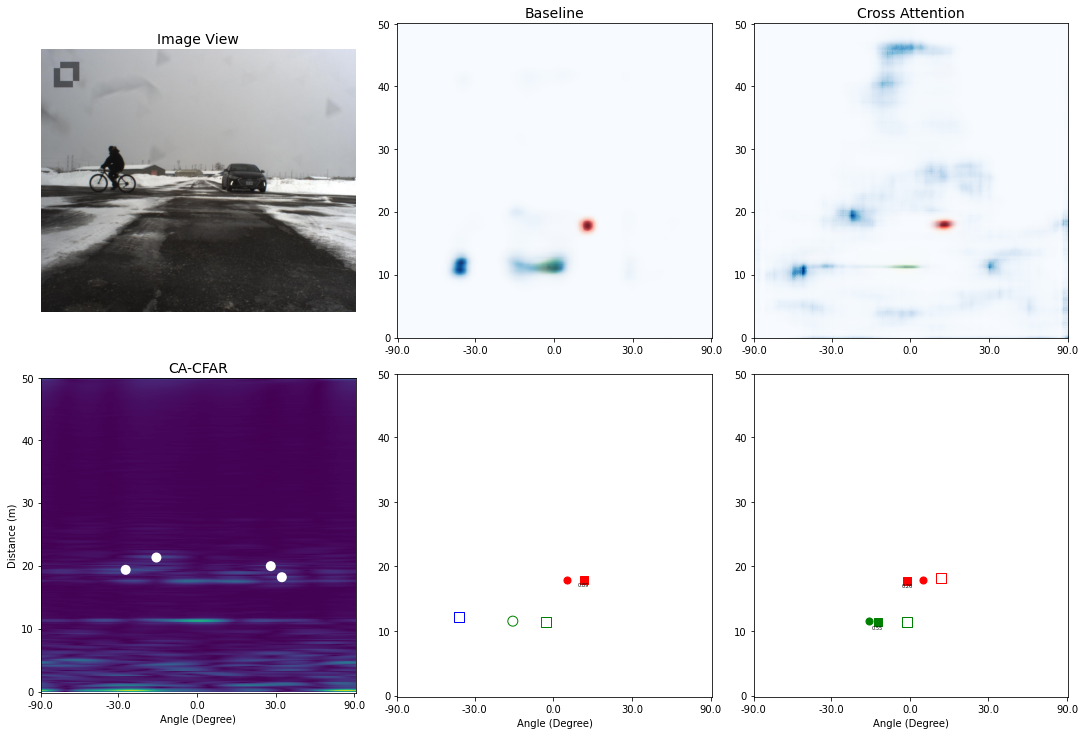

In [187]:

for frame in range(15,16):
    grd_map = np.load(f"output\saved_baseline\{frame}_grd_map.npy")
    ra_map = np.load(f"output\saved_baseline\{frame}_ra_map.npy")
    pred_map_f = np.load(f"output\saved_fusion\{frame}_preds_map.npy")
    cam_dir = r'output\saved_baseline'
    name = np.load(r'output\saved_baseline\name_list.npy',allow_pickle=True).item()


    pred_cp_f =torch.Tensor().to(device =device)
    grd_cp =torch.Tensor().to(device =device)

    grd_intent,grd_idx = peaks_detect(torch.from_numpy(grd_map).to(device=device),mask,peak_cls,heat_thresh=0.8)
    grd_idx = distribute(grd_idx,device)
    grd_idx=grd_idx.to(device=device)
    #grd_idx,grd_intent= association(grd_intent,grd_idx,device)

    pred_intent_f,pred_idx_f = peaks_detect(torch.from_numpy(pred_map_f).to(device=device),mask,peak_cls,heat_thresh=0.2)
    pred_idx_f = distribute(pred_idx_f,device)
    #print(len(pred_idx[0]))
    pred_idx_f,pred_intent_f= association(pred_intent_f,pred_idx_f,device)
    pred_idx_f=pred_idx_f.to(device=device)

    grd_cp,prd_cp_f = analyse(grd_idx,pred_idx_f,grd_cp,pred_cp_f,frame,dist_thresh=2)
    pred_idx_f =pred_idx_f.numpy()
    grd_cp = np.reshape(grd_cp.numpy(),(len(grd_cp.numpy())//5,5)).astype('int')
    prd_cp_f = np.reshape(prd_cp_f.numpy(),(len(prd_cp_f.numpy())//5,5)).astype('int')

    tp_cord_f = dict()
    tp_cord_f['prd']={}
    tp_cord_f['grd']={}
    for i in range(16):
        tp_cord_f['prd'][f"{i}"]={}
        tp_cord_f['grd'][f"{i}"]={}
        for j in range(3):
            tp_cord_f['prd'][f"{i}"][f"{j}"]=[]
            tp_cord_f['grd'][f"{i}"][f"{j}"]=[]


    for ind in prd_cp_f:
        frm = ind[0]
        c_ind = ind[1]
        cord = ind[2:4]
        tp_cord_f['prd'][f"{frm}"][f"{c_ind}"].append(cord)

    for ind in grd_cp:
        frm = ind[0]
        c_ind = ind[1]
        cord = ind[2:4]
        tp_cord_f['grd'][f"{frm}"][f"{c_ind}"].append(cord)







    #grd_map = np.load(f"output\saved_baseline\{frame}_grd_map.npy")
    #ra_map = np.load(f"output\saved_baseline\{frame}_ra_map.npy")
    pred_map = np.load(f"output\saved_baseline\{frame}_preds_map.npy")
    #cam_dir = r'output\saved_baseline'


    pred_cp =torch.Tensor().to(device =device)
    grd_cp =torch.Tensor().to(device =device)

    grd_intent,grd_idx = peaks_detect(torch.from_numpy(grd_map).to(device=device),mask,peak_cls,heat_thresh=0.8)
    grd_idx = distribute(grd_idx,device)
    grd_idx=grd_idx.to(device=device)
    #grd_idx,grd_intent= association(grd_intent,grd_idx,device)

    pred_intent,pred_idx = peaks_detect(torch.from_numpy(pred_map).to(device=device),mask,peak_cls,heat_thresh=0.2)
    pred_idx = distribute(pred_idx,device)
    #print(len(pred_idx[0]))
    pred_idx,pred_intent= association(pred_intent,pred_idx,device)
    pred_idx=pred_idx.to(device=device)

    grd_cp,prd_cp = analyse(grd_idx,pred_idx,grd_cp,pred_cp,frame,dist_thresh=2)
    pred_idx =pred_idx.numpy()
    grd_idx = grd_idx.numpy()
    grd_cp = np.reshape(grd_cp.numpy(),(len(grd_cp.numpy())//5,5)).astype('int')
    prd_cp = np.reshape(prd_cp.numpy(),(len(prd_cp.numpy())//5,5)).astype('int')

    tp_cord = dict()
    tp_cord['prd']={}
    tp_cord['grd']={}
    for i in range(16):
        tp_cord['prd'][f"{i}"]={}
        tp_cord['grd'][f"{i}"]={}
        for j in range(3):
            tp_cord['prd'][f"{i}"][f"{j}"]=[]
            tp_cord['grd'][f"{i}"][f"{j}"]=[]


    for ind in prd_cp:
        frm = ind[0]
        c_ind = ind[1]
        cord = ind[2:4]
        tp_cord['prd'][f"{frm}"][f"{c_ind}"].append(cord)

    for ind in grd_cp:
        frm = ind[0]
        c_ind = ind[1]
        cord = ind[2:4]
        tp_cord['grd'][f"{frm}"][f"{c_ind}"].append(cord)



    #for idx in range(pred_map.shape[0]):
    for idx in range(10,11):   
        FA_rate_adjustment=0.0001
        FA_rate=0.0003
        ra_mapfar = ra_map[idx,0,::]
        
        pred_inst = np.copy(pred_map[idx,:,:,:])
        pred_inst_f = np.copy(pred_map_f[idx,:,:,:])
        over = False
        while not over:
            FA_rate =FA_rate+FA_rate_adjustment
            out = DetectPeaksOSCFAR_2D(ra_mapfar,40,40,40,40,FA_rate)
            if len(out)>3 or FA_rate>1:
                over =True




        ra_size = pred_inst.shape[1:]
        fig, ax  = plt.subplots(2,3,figsize = (15,10))
        #plt.title('Predictions')
        #plt.suptitle('Predictions vs GT')
        fig.tight_layout()
        ax[0,0].axis('off')
        
        ax[0,0].imshow(mpimg.imread(os.path.join(cam_dir,f"{frame}_{idx}.jpg")))
        ax[1,0].imshow(ra_mapfar)
        ax[0,0].title.set_text('Image View')
        ax[0,0].title.set_fontsize(14)


        color_map = ['Blues','Greens','Reds']
        title = ['Pedestrain','Cyclist', 'Car']
        for chn in range(pred_inst.shape[0]):
            if chn!=0:
                ax[0,1].imshow(pred_inst[chn,:,:],cmap=color_map[chn],alpha=pred_inst[chn,:,:])
                ax[0,2].imshow(pred_inst_f[chn,:,:],cmap=color_map[chn],alpha=pred_inst[chn,:,:])
            else:
                ax[0,1].imshow(pred_inst[chn,:,:],cmap=color_map[chn])
                ax[0,2].imshow(pred_inst_f[chn,:,:],cmap=color_map[chn])
        
        
        ax[0,1].title.set_text('Baseline')
        ax[0,1].title.set_fontsize(14)
        ax[0,2].title.set_text('Cross Attention')
        ax[0,2].title.set_fontsize(14)
        ax[1,0].title.set_text('CA-CFAR')
        ax[1,0].title.set_fontsize(14)

        for i in range(3):
            for j in range(2):
                if i!=0 or j!=0:
                    ax[j,i].set_xticks([0, ra_size[1]*1/4-1,ra_size[1]*2/4-1,ra_size[1]*3/4-1,ra_size[1]-1])
                    ax[j,i].set_yticks([0,ra_size[1]*1/5-1,ra_size[1]*2/5-1,ra_size[1]*3/5-1, ra_size[1]*4/5-1,ra_size[1]-1])
                    ax[j,i].set_yticklabels([50, 40, 30, 20, 10, 0])
                    ax[j,i].set_xticklabels(np.round(np.rad2deg(np.arcsin(np.linspace(-1,1,5))),1))
                    if j==1:
                        #ax[j,i].set_yticklabels([0, 10, 20, 30, 40, 50])
                        ax[j,i].set_xlabel('Angle (Degree)')
                        if i==0:
                            ax[j,i].set_ylabel('Distance (m)')

        for i in range(3):
            ax[1,i].set_xlim(0,ra_map.shape[2])
            ax[1,i].set_ylim(0,ra_map.shape[3])
            ax[1,i].invert_yaxis()

        cord = dict()
        cord['Pred'] ={'0':[],'1':[],'2':[]}
        cord['GT'] ={'0':[],'1':[],'2':[]}



        #ax[2].set_xlim(0,ra_map.shape[2])
        #ax[2].set_ylim(0,ra_map.shape[3])

        
        color = ['blue','green','red']

        # Base line scatter plot

        for cnt,pred_cord in enumerate(pred_idx):
            if pred_cord[0]==idx :
                chn = pred_cord[1]
                row , col ,intent= pred_cord[2],pred_cord[3], pred_intent[cnt]
                
                false_p = tp_cord['prd'][f"{int(idx)}"][f"{int(chn)}"]
                token = False
                for cord_fp in false_p:
                    if int(row)==cord_fp[0] and int(col) == cord_fp[1]:
                        token = True
                        ax[1,1].scatter(int(col), int(row), s=100, edgecolors=color[int(chn)],marker="s", facecolor ='none')

                if not token:
                        ax[1,1].scatter(int(col), int(row), s=50, c=color[int(chn)],marker="s")
                        ax[1,1].text(col -5, int(row+5), "%.2f" % intent, color='black', fontsize=5)


        for cnt,grd_cord in enumerate(grd_idx):
            if grd_cord[0] ==idx:
                token = False
                chn = grd_cord[1]        
                row , col = grd_cord[2],grd_cord[3]
                
                false_n = tp_cord['grd'][f"{int(idx)}"][f"{int(chn)}"]
                for cord_fp in false_n:
                    if int(row)==cord_fp[0] and int(col) == cord_fp[1]: 
                        token=True
                        ax[1,1].scatter(int(col), int(row), s=100, edgecolors=color[int(chn)],marker="o", facecolor ='none')
                if not token:
                    ax[1,1].scatter(col,row, s=50, c=color[int(chn)],marker="o")

        # Our scatter plot
        for cnt,pred_cord in enumerate(pred_idx_f):
            if pred_cord[0]==idx :
                chn = pred_cord[1]
                row , col ,intent= pred_cord[2],pred_cord[3], pred_intent_f[cnt]
                
                false_p = tp_cord_f['prd'][f"{int(idx)}"][f"{int(chn)}"]
                token = False
                for cord_fp in false_p:
                    if int(row)==cord_fp[0] and int(col) == cord_fp[1]:
                        token = True
                        ax[1,2].scatter(int(col), int(row), s=100, edgecolors=color[int(chn)],marker="s", facecolor ='none')

                if not token:
                        ax[1,2].scatter(int(col), int(row), s=50, c=color[int(chn)],marker="s")
                        ax[1,2].text(col -5, int(row+5), "%.2f" % intent, color='black', fontsize=5)


        for cnt,grd_cord in enumerate(grd_idx):
            if grd_cord[0] ==idx:
                token = False
                chn = grd_cord[1]        
                row , col = grd_cord[2],grd_cord[3]
                
                false_n = tp_cord_f['grd'][f"{int(idx)}"][f"{int(chn)}"]
                for cord_fp in false_n:
                    if int(row)==cord_fp[0] and int(col) == cord_fp[1]: 
                        token=True
                        ax[1,2].scatter(int(col), int(row), s=100, edgecolors=color[int(chn)],marker="o", facecolor ='none')
                if not token:
                    ax[1,2].scatter(col,row, s=50, c=color[int(chn)],marker="o")    
        
        
        for cord in out:
            row,col = cord[0],cord[1]
            ax[1,0].scatter(int(col), int(row), s=100, edgecolors='none',marker="o", facecolor ='white')

        
        
        plt.savefig(os.path.join(destination,str(frame)+'_'+str(idx)+'.jpg'),dpi=1200)
        #plt.close()
                        


In [168]:
out = DetectPeaksOSCFAR_2D(ra_mapfar,40,40,40,40,0.001)

In [188]:
out

array([[146,  94],
       [153, 187],
       [156,  69],
       [162, 196]])

In [189]:
for cord in grd_idx:
    if cord[0]==idx: print(cord)

[ 10.   1. 196.  94.]
[ 10.   2. 163. 138.]
